In [107]:
import pandas as pd
import numpy as np
import ast
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# from functions_josh import *

In [108]:
# Load dataframe
df = pd.read_csv('shows_imdb_rt.csv', index_col=0)

In [109]:
# Take a peak
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,rt_audience_rating,genres,tv_rating,release_year,runtime_mins,imdb_url
0,La Casa de Papel,Netflix,8.5,215007,91.0,82.0,"['action', 'crime', 'mystery', 'thriller']",TV-MA,2017.0,70.0,https://www.imdb.com/title/tt6468322/
1,Ozark,Netflix,8.4,136710,81.0,91.0,"['crime', 'drama', 'thriller']",TV-MA,2017.0,60.0,https://www.imdb.com/title/tt5071412/
2,Tiger King,Netflix,7.8,33700,86.0,86.0,"['documentary', 'crime']",TV-MA,2020.0,31.0,https://www.imdb.com/title/tt11823076/
3,Westworld,HBO,8.7,388252,85.0,80.0,"['drama', 'mystery', 'sci-fi', 'western']",TV-MA,2016.0,62.0,https://www.imdb.com/title/tt0475784/
4,The Walking Dead,AMC,8.2,821809,81.0,78.0,"['drama', 'horror', 'thriller']",TV-MA,2010.0,44.0,https://www.imdb.com/title/tt1520211/


In [110]:
# Check for datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               247 non-null    object 
 1   network             247 non-null    object 
 2   imdb_rating         247 non-null    float64
 3   num_imdb_ratings    247 non-null    int64  
 4   rt_critic_rating    247 non-null    float64
 5   rt_audience_rating  194 non-null    float64
 6   genres              247 non-null    object 
 7   tv_rating           247 non-null    object 
 8   release_year        247 non-null    float64
 9   runtime_mins        247 non-null    float64
 10  imdb_url            247 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 23.2+ KB


In [111]:
# Drop column with null values, knowing we can grab it later if necessary
df = df.dropna(axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    float64
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    float64
 8   runtime_mins      247 non-null    float64
 9   imdb_url          247 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 21.2+ KB


In [112]:
# Change dtypes for columns without null values
df[['rt_critic_rating', 'release_year', 'runtime_mins']] = df[['rt_critic_rating', 'release_year', 'runtime_mins']].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             247 non-null    object 
 1   network           247 non-null    object 
 2   imdb_rating       247 non-null    float64
 3   num_imdb_ratings  247 non-null    int64  
 4   rt_critic_rating  247 non-null    int64  
 5   genres            247 non-null    object 
 6   tv_rating         247 non-null    object 
 7   release_year      247 non-null    int64  
 8   runtime_mins      247 non-null    int64  
 9   imdb_url          247 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 21.2+ KB


In [113]:
# Notice that genres are lists trapped inside a string
df.iloc[1]['genres']

"['crime', 'drama', 'thriller']"

In [114]:
# De-stringify the genres list scraped from IMDB
df['genres'] = df.genres.apply(lambda x: ast.literal_eval(x))
df.iloc[1]['genres']

['crime', 'drama', 'thriller']

In [115]:
# Make a dataframe of dummy genre colums to get a count of each genre
df_genres = pd.get_dummies(df['genres'].apply(pd.Series).stack()).sum(level=0)
df_genres

,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
243,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
244,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
245,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
# Merge dummies dataframe onto original dataframe
df = pd.concat([df, df_genre_dummies], axis=1)
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,La Casa de Papel,Netflix,8.5,215007,91,"[action, crime, mystery, thriller]",TV-MA,2017,70,https://www.imdb.com/title/tt6468322/,...,0,0,0,0,0,0,0,1,0,0
1,Ozark,Netflix,8.4,136710,81,"[crime, drama, thriller]",TV-MA,2017,60,https://www.imdb.com/title/tt5071412/,...,0,0,0,0,0,0,0,1,0,0
2,Tiger King,Netflix,7.8,33700,86,"[documentary, crime]",TV-MA,2020,31,https://www.imdb.com/title/tt11823076/,...,0,0,0,0,0,0,0,0,0,0
3,Westworld,HBO,8.7,388252,85,"[drama, mystery, sci-fi, western]",TV-MA,2016,62,https://www.imdb.com/title/tt0475784/,...,0,0,0,1,0,0,0,0,0,1
4,The Walking Dead,AMC,8.2,821809,81,"[drama, horror, thriller]",TV-MA,2010,44,https://www.imdb.com/title/tt1520211/,...,0,0,0,0,0,0,0,1,0,0


In [131]:
# Remove outliers for the crucial numerical data

# Calculate the z-scores of the 
z_scores = stats.zscore(df[['imdb_rating', 'num_imdb_ratings', 'rt_critic_rating', 'release_year']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

In [132]:
# Save a copy for good measure :P
df.to_csv('shows_imdb_rt_updated.csv')

In [118]:
df = df.sort_values(['imdb_rating', 'rt_critic_rating', 'num_imdb_ratings'], ascending=False)

In [209]:
df.head()

,title,network,imdb_rating,num_imdb_ratings,rt_critic_rating,genres,tv_rating,release_year,runtime_mins,imdb_url,...,news,reality-tv,romance,sci-fi,short,sport,talk-show,thriller,war,western
98,Planet Earth II,BBC America,9.5,86650,100,[documentary],TV-G,2016,29,https://www.imdb.com/title/tt5491994/,...,0,0,0,0,0,0,0,0,0,0
64,Chernobyl,HBO,9.4,442470,96,"[drama, history, thriller]",TV-MA,2019,33,https://www.imdb.com/title/tt7366338/,...,0,0,0,0,0,0,0,1,0,0
99,Planet Earth,Discovery Channel,9.4,158876,95,[documentary],TV-PG,2006,53,https://www.imdb.com/title/tt0795176/,...,0,0,0,0,0,0,0,0,0,0
100,Band of Brothers,HBO,9.4,349246,94,"[action, drama, history, war]",TV-MA,2001,59,https://www.imdb.com/title/tt0185906/,...,0,0,0,0,0,0,0,0,1,0
101,Blue Planet II,BBC America,9.3,28145,97,[documentary],TV-G,2017,36,https://www.imdb.com/title/tt6769208/,...,0,0,0,0,0,0,0,0,0,0


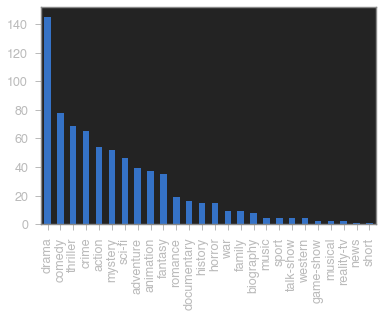

In [150]:
genres.sum().sort_values(ascending=False).plot.bar()

In [173]:
genres_weight_imdb = genres.apply(lambda x: x*df['imdb_rating'])
genres_weight_rt = genres.apply(lambda x: x*df['rt_critic_rating'])

In [186]:
genres_weight_imdb.sum()/genres.sum()

action         8.461111
adventure      8.507692
animation      8.643243
biography      8.600000
comedy         8.551282
crime          8.393846
documentary    8.831250
drama          8.402069
family         8.688889
fantasy        8.448571
game-show      8.550000
history        8.726667
horror         8.300000
music          8.575000
musical        8.200000
mystery        8.319231
news           8.900000
reality-tv     8.500000
romance        8.400000
sci-fi         8.465217
short          8.500000
sport          8.350000
talk-show      8.675000
thriller       8.415942
war            8.755556
western        8.600000
dtype: float64

In [176]:
genres_weight_rt.sum()/genres.sum()

action          88.814815
adventure       89.230769
animation       93.702703
biography       85.375000
comedy          91.987179
crime           88.630769
documentary     90.625000
drama           87.951724
family          94.888889
fantasy         91.000000
game-show      100.000000
history         88.666667
horror          87.466667
music           96.750000
musical         84.000000
mystery         87.961538
news            98.000000
reality-tv      93.500000
romance         86.789474
sci-fi          90.304348
short           77.000000
sport           91.500000
talk-show       81.500000
thriller        88.594203
war             93.222222
western         93.500000
dtype: float64

In [154]:
df[df['release_year'] >= 2010]

Index(['action', 'adventure', 'animation', 'biography', 'comedy', 'crime',
       'documentary', 'drama', 'family', 'fantasy', 'game-show', 'history',
       'horror', 'music', 'musical', 'mystery', 'news', 'reality-tv',
       'romance', 'sci-fi', 'short', 'sport', 'talk-show', 'thriller', 'war',
       'western'],
      dtype='object')

(array([ 3.,  2.,  3.,  5.,  3.,  3.,  8.,  5.,  3.,  5., 10., 35., 18.,
        22.,  4.,  1.,  1.,  1.,  2.,  2.]),
 array([7.2  , 7.315, 7.43 , 7.545, 7.66 , 7.775, 7.89 , 8.005, 8.12 ,
        8.235, 8.35 , 8.465, 8.58 , 8.695, 8.81 , 8.925, 9.04 , 9.155,
        9.27 , 9.385, 9.5  ]),
 <a list of 20 Patch objects>)

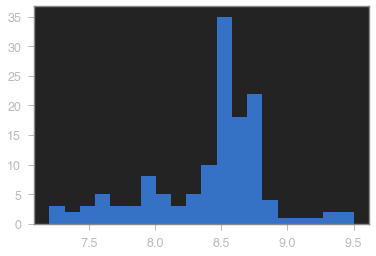

In [217]:
plt.hist(df[df['release_year'] >= 2010]['imdb_rating'], bins=20)

In [219]:
df[df['release_year'] >= 2010]['imdb_rating']

98     9.5
64     9.4
101    9.3
102    9.3
36     9.2
      ... 
88     7.4
60     7.4
48     7.3
44     7.2
80     7.2
Name: imdb_rating, Length: 136, dtype: float64

In [216]:
df[df['release_year'] >= 2010]['rt_critic_rating']

98     100
64      96
101     97
102     93
36      95
      ... 
88      83
60      66
48      72
44      59
80      57
Name: rt_critic_rating, Length: 136, dtype: int64

(array([ 4.,  1.,  1.,  0.,  3.,  2.,  2.,  1.,  2.,  4.,  2.,  6.,  5.,
        12., 10.,  8., 24., 15., 17., 17.]),
 array([ 57.  ,  59.15,  61.3 ,  63.45,  65.6 ,  67.75,  69.9 ,  72.05,
         74.2 ,  76.35,  78.5 ,  80.65,  82.8 ,  84.95,  87.1 ,  89.25,
         91.4 ,  93.55,  95.7 ,  97.85, 100.  ]),
 <a list of 20 Patch objects>)

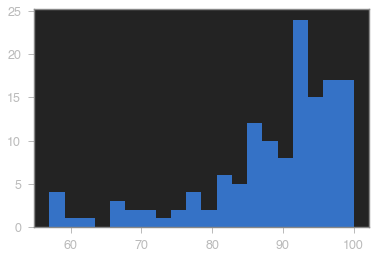

In [218]:
plt.hist(df[df['release_year'] >= 2010]['rt_critic_rating'], bins=20)

In [228]:
df1 = df[df['runtime_mins'] <= 43]
df2 = df[df['runtime_mins'] > 43]

In [229]:
df1['imdb_rating'].describe()

count    118.000000
mean       8.488136
std        0.407865
min        7.200000
25%        8.400000
50%        8.500000
75%        8.700000
max        9.500000
Name: imdb_rating, dtype: float64

In [230]:
df2['imdb_rating'].describe()

count    113.000000
mean       8.475221
std        0.396982
min        7.200000
25%        8.400000
50%        8.500000
75%        8.700000
max        9.400000
Name: imdb_rating, dtype: float64

In [231]:
df1['rt_critic_rating'].describe()

count    118.000000
mean      91.762712
std        8.497036
min       57.000000
25%       88.000000
50%       93.000000
75%      100.000000
max      100.000000
Name: rt_critic_rating, dtype: float64

In [232]:
df2['rt_critic_rating'].describe()

count    113.000000
mean      86.867257
std       10.043214
min       59.000000
25%       82.000000
50%       89.000000
75%       94.000000
max      100.000000
Name: rt_critic_rating, dtype: float64